In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import scipy as sc, scipy.io
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib.colors import LightSource
import matplotlib as mpl

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

%matplotlib inline

In [2]:
idealf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')
ideal = idealf['Bathymetry'][:]
realf = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_for_agrif.nc')
real = realf['Bathymetry'][:]

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
arr1 = np.concatenate((np.array([0.5,45,50,60,70,80]), np.array([500, 1000])), axis=0)
mid = 134.5

clocx = [95]*len(arr1)
manual = []

for i in range(len(clocx)):
    clocy = find_nearest(ideal[:, clocx[i]], arr1[i])
    manual.append(tuple((clocx[i], clocy)))
    
arr2 = np.concatenate((np.arange(100, 500, 50),np.arange(600, 1000, 100)))

In [5]:
print(arr1)
print(arr2)

[5.0e-01 4.5e+01 5.0e+01 6.0e+01 7.0e+01 8.0e+01 5.0e+02 1.0e+03]
[100 150 200 250 300 350 400 450 600 700 800 900]


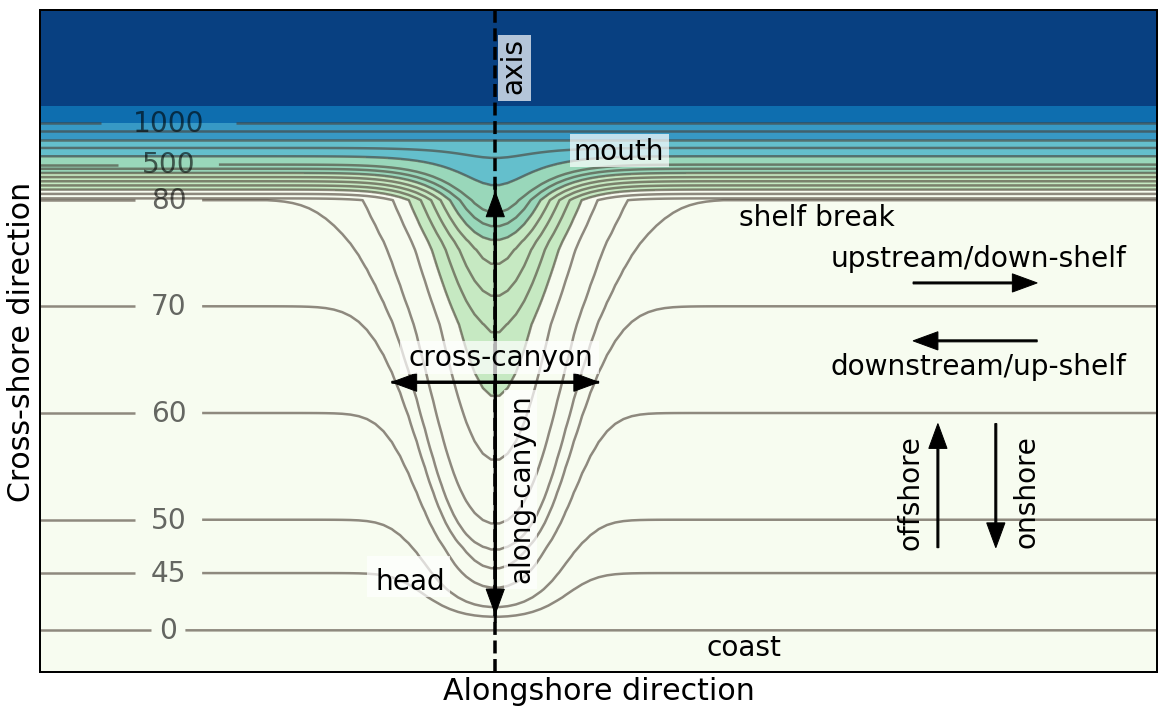

In [9]:
list_ocean = ['#f7fcf0','#ccebc5','#a8ddb5','#7bccc4','#4eb3d3','#2b8cbe','#0868ac','#084081']#'#e0f3db'(2nd)
cmap = LinearSegmentedColormap.from_list('mycmap', list_ocean, N=500, gamma=1)
cmap.set_bad(color='#8b7765')

c = '#483C32'
fs=28
a='left'
w, hw, hl = 0.24, 2.2, 3
xmin, xmax, ymin, ymax = mid-55, mid+80, 5, 85

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.contourf(ideal, cmap=cmap, vmin=100, vmax=1300, alpha=1)
ax.contour(ideal, levels=arr2, colors=c, zorder=1, linewidths=2.5, alpha=0.6)
c = ax.contour(ideal, levels=arr1, colors=c, zorder=1, linewidths=2.5, alpha=0.6)
plt.clabel(c, inline=1, fontsize=fs, fmt='%1.f', manual=manual, inline_spacing=0.1, colors='k')#, zorder=2
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_aspect(aspect='equal')
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False,labelleft=False)
#ax.grid()
mpl.rcParams['axes.linewidth'] = 2

ax.axvline(mid, c='k', ls='--', lw=3.5,zorder=1)#'#084081'
ax.add_patch(patches.Rectangle((134.8, 74),(4),(8), fc='w', alpha=0.7,zorder=2))
ax.annotate('axis', xy=(135,79), fontsize=fs, ha=a, rotation=90)

ax.arrow(122, 40, 147-122, 0, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True,zorder=1)
ax.arrow(147, 40, 122-147, 0, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True,zorder=1)
ax.add_patch(patches.Rectangle((123, 41),(24),(4), fc='w', alpha=0.7,zorder=2))
ax.text(124, 42, 'cross-canyon', fontsize=fs,zorder=3)
# ax.plot([122, 147], [40, 40], lw=4, c='k', marker='.', ms=30)

ax.arrow(mid, 11, 0, 64-12, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True)
ax.arrow(mid, 64, 0, 12-64, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True)
ax.add_patch(patches.Rectangle((135.5, 15),(4),(24), fc='w', alpha=0.7,zorder=2))
ax.text(136, 36, 'along-canyon', fontsize=fs, rotation=90,zorder=3)
# ax.plot([mid, mid], [11, 64], lw=4, c='k', marker='.', ms=30)

ax.arrow(185, 52, 15, 0, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True)
ax.text(175, 52+2, 'upstream/down-shelf', fontsize=fs)
ax.arrow(185+15, 45, -15, 0, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True)
ax.text(175, 45-4, 'downstream/up-shelf', fontsize=fs)

ax.arrow(188, 20, 0, 15, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True)
ax.text(188-5, 31, 'offshore', fontsize=fs, rotation='vertical')
ax.arrow(195, 20+15, 0, -15, width=w, head_width=hw, head_length=hl, fc='k', ec='k', length_includes_head=True)
ax.text(195+2, 31, 'onshore', fontsize=fs, rotation='vertical')

ax.annotate('coast', xy=(160,7), fontsize=fs, ha=a)
ax.annotate('head', xy=(120,15), fontsize=fs, ha=a)
ax.add_patch(patches.Rectangle((119, 14),(10),(5), fc='w', alpha=0.7))
ax.annotate('mouth', xy=(144,67), fontsize=fs, ha=a)
ax.add_patch(patches.Rectangle((143.5, 66),(12),(4), fc='w', alpha=0.7))
ax.annotate('shelf break', xy=(164,59), fontsize=fs, ha=a)

ax.set_ylabel('Cross-shore direction', fontsize=30)
ax.set_xlabel('Alongshore direction', fontsize=30)

fig.tight_layout()
fig.savefig('./intro_definitions.png', dpi=200, bbox_inches='tight')